In [220]:
import matplotlib.pyplot as plt
import numpy as np  
from matplotlib.ticker import FuncFormatter  
from pprint import pprint  

from get_completion_evaluation import read_completion_list, process_completion_list
from get_completion_evaluation import process_ground_truth_list, load_csv_for_evaluation
from get_completion_evaluation import get_evaluation_results, get_evaluation_results_macro, separate_class_evaluation, transform_f1_format
from get_completion_evaluation import plot_value, plot_line_graphs_with_values, plot_line_graphs_with_values_mul

%reload_ext autoreload
%autoreload 2

In [221]:
def plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim, *lists, labels=None, title='Line Graph', xlabel='X-axis', ylabel='Y-axis'):
    """
    Plots multiple line graphs from provided lists and annotates each point with its value.

    Parameters:
    x_values: list of numbers representing the x-axis values for all lists.
    *lists: arbitrary number of lists, each representing a line to plot.
    labels: list of strings, labels corresponding to the lists.
    title: title of the plot.
    xlabel: label for the x-axis.
    ylabel: label for the y-axis.
    """
    
    def custom_transform(y):  
        if y <= 60:  
            return y * 0.5
        elif y <= 80:  
            return 30 + (y - 60)
        else:  
            return 50 + (y - 80) * 2
  
    def inverse_transform(y):  
        if y <= 30:  
            return y * 2  
        elif y <= 50:  
            return 60 + (y - 30)  
        else:  
            return 80 + (y - 50) / 2  


    
    # Verify that all data lists have the same length as x_values
    for data in lists:
        if len(data) != len(x_values):
            raise ValueError("All input lists must have the same length as the x_values list. length of input list: {}. length of x_value list: {}.".format( len(data), len(x_values) ))
    
    # Check if labels are provided and match the number of lists
    if labels and len(labels) != len(lists):
        raise ValueError("Number of labels must match the number of lists provided. Number of labels: {}. Number of lists: {}.".format(len(labels), len(lists)))
    
    # Set a style for the plot
    plt.style.use('seaborn-v0_8-darkgrid')

    # Create a figure and an axes
    fig, ax = plt.subplots( figsize=(10, 4.5))

    # Plot each list
    for i, data in enumerate(lists):
        # transform the data based on the specific y axis
        data = np.array([custom_transform(val) for val in data])  

        label = labels[i] if labels else f'Line {i+1}'
        ax.plot(x_values, data, '--', label=label, linewidth=1.7)

        # Annotate each point with its value
        for x, y in zip(x_values, data):
            if y == max(data):
                # position is already transformed with the customed y_axis
                ax.text(x, y, 'x', fontsize=15,fontweight='bold', ha='center', va='center')  
                print(np.round(inverse_transform(y),1))
                
                # the 1st figure
                if np.round(inverse_transform(y),1) == 75.9:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(17, -4), textcoords='offset points', fontsize=14, color='black', ha='center')
                    continue
                elif np.round(inverse_transform(y),1) == 88.9:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(17, -4), textcoords='offset points', fontsize=14, color='black', ha='center')                                                    # value need to inverse transformed
                    continue
                elif np.round(inverse_transform(y),1) == 94.3:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(-2, 10), textcoords='offset points', fontsize=14, color='black', ha='center')                                                    # value need to inverse transformed
                    continue    
                elif np.round(inverse_transform(y),1) == 92.6:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(-20, 2), textcoords='offset points', fontsize=14, color='black', ha='center')                                                    # value need to inverse transformed
                    continue  
                    
                # the 3rd figure
                elif np.round(inverse_transform(y),1) == 77.7:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(20, -10), textcoords='offset points', fontsize=14, color='black', ha='center')                                                    # value need to inverse transformed
                    continue  

                # the 5th figure
                elif np.round(inverse_transform(y),1) == 90.5:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(-8, 8), textcoords='offset points', fontsize=14, color='black', ha='center')                                                    # value need to inverse transformed
                    continue  

                # the 6th figure
                elif np.round(inverse_transform(y),1) == 73.5:
                    ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(-17, 3), textcoords='offset points', fontsize=14, color='black', ha='center')                                                    # value need to inverse transformed
                    continue  
                # value need to inverse transformed
                ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(20, 1.5), textcoords='offset points', fontsize=14, color='black', ha='center')
            
    # Add grid, legend, and labels
    ax.grid(True, which='both', linestyle='--', linewidth=1.3, alpha=1)
    #ax.legend(loc='best', ncol=3, frameon=True, facecolor='white', framealpha=0.9,  prop={'size': 13})
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel(xlabel, fontsize = 20)
    ax.set_ylabel(ylabel, fontsize = 20)
    
    # Set custom ticks and labels  
    ax.tick_params(axis='x', labelsize=13)
    ax.set_yticks(custom_ticks)  
    ax.set_yticklabels(custom_labels ,fontsize = 14)  
    ax.set_ylim(ylim[0],ylim[1]) 

      
    # Formatter to display custom y-axis labels  
    formatter = FuncFormatter(lambda val, pos: f'{inverse_transform(val):.0f}')  
    ax.yaxis.set_major_formatter(formatter)  


    

    # Optimize layout
    fig.tight_layout()

    # Display the plot
    plt.show()

    fig.savefig(save_path, bbox_inches='tight') 

93.5
90.3
93.5
75.4
94.3
92.6
94.3


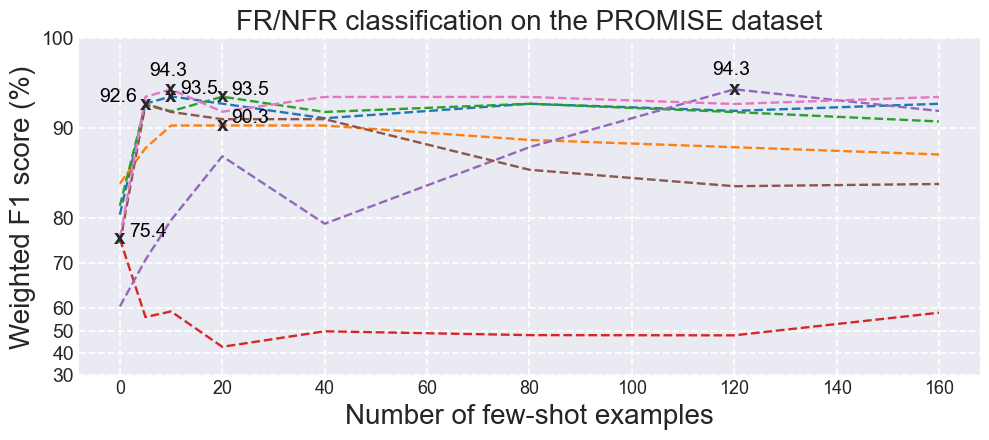

In [ ]:
# RPOMISE binary
save_path = "./figures/line_graph_5models_promise_bi.pdf"

x_values = [ 0, 5, 10, 20, 40, 80, 120, 160]
custom_ticks = [15, 20, 25, 30, 40, 50, 70, 90]  
custom_labels = [30, 40, 50, 60, 70, 80, 90, 100]  
ylim = (15,90)

gpt4_tfidf_promise_b = [80.39, 92.73, 93.54, 92.73, 91.11, 92.72, 91.93, 92.72]
gpt35_tfidf_promise_b = [83.85, 87.79, 90.3, 90.31, 90.3, 88.7, 87.89, 87.08]
llama8b_tfidf_promise_b = [81.38, 92.69, 91.89, 93.51, 91.81, 92.72, 91.8, 90.75]
llama1b_tfidf_promise_b = [75.4, 55.98, 58.48, 42.75, 49.65, 47.95, 47.85, 57.92]
mistral7b_tfidf_promise_b = [60.36, 70.74, 79.56, 86.88, 78.76, 87.89, 94.33, 91.92]
gemma4b_tfidf_promise_b = [74.41, 92.65, 91.81, 91.01, 91.01, 85.38, 83.55, 83.8]
deepseekv3_tfidf_promise_b = [75.49, 93.5, 94.32, 91.84, 93.48, 93.48, 92.7, 93.48]

plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b,gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3' ], 
                                 title='FR/NFR classification on the PROMISE dataset', xlabel='Number of few-shot examples', ylabel='Weighted F1 score (%)')

In [ ]:
# RPOMISE binary
save_path = "./figures/line_graph_5models_pure_bi.pdf"

x_values = [0, 5, 10, 20, 40, 80, 120, 160]
custom_ticks = [15, 20, 25, 30, 40, 50, 70, 90]  
custom_labels = [30, 40, 50, 60, 70, 80, 90, 100]  
ylim = (15,90)

gpt4_tfidf_promise_b = [83.03, 87.71, 88.05, 89.31, 88.61, 88.61, 88.08, 87.57]
gpt35_tfidf_promise_b = [81.8, 84.34, 85.17, 86.75, 85.77, 85.26, 84.28, 83.7]
mistral7b_tfidf_promise_b = [78.39, 71.6, 76.7, 80.23, 82.42, 81.07, 82.63, 83.49]
llama8b_tfidf_promise_b = [81.06, 88.5, 87.91, 86.92, 86.17, 85.99, 84.81, 85.29]
llama1b_tfidf_promise_b = [78.64, 71.01, 69.33, 64.62, 66.21, 58.42, 60.8, 55.87]
gemma4b_tfidf_promise_b = [78.39, 87.87, 86.72, 85.15, 84.19, 82.99, 74.35, 74.98]
deepseekv3_tfidf_promise_b = 


plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b, gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3'], 
                                 title='FR/NFR classification on the PURE dataset', xlabel='Number of few-shot examples', ylabel='Weighted F1 score (%)')



SyntaxError: invalid syntax (3539325141.py, line 15)

## Original promise multi-class

89.5
77.7
90.0
75.9
79.3
78.5
90.6


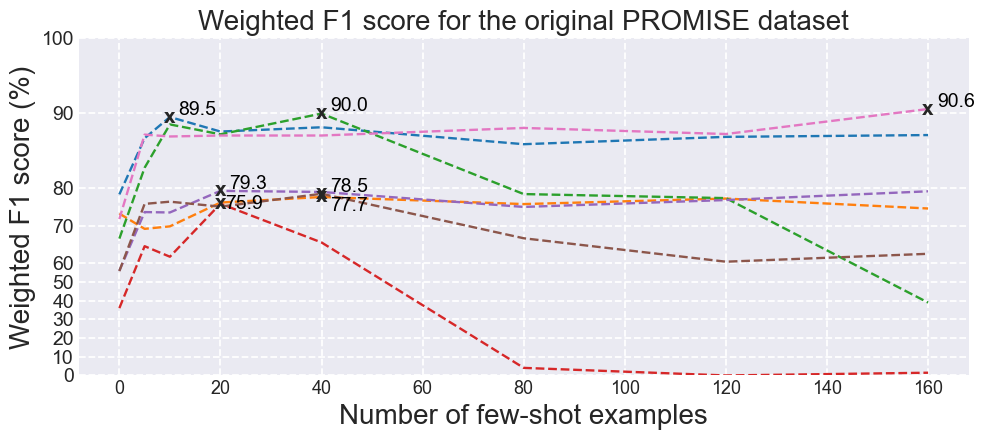

In [ ]:
# NEW RPOMISE multi-class
save_path = "./figures/line_graph_5models_promise_original_weighted.pdf"

x_values = [0, 5, 10, 20, 40, 80, 120, 160]
custom_ticks = [0, 5, 10, 15, 20, 25, 30, 40, 50, 70, 90]  
custom_labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ylim = (0,90)


gpt4_tfidf_promise_b = [78.36, 86.68, 89.51, 87.57, 88.14, 85.88, 86.86, 87.1]
gpt35_tfidf_promise_b = [73.23, 69.15, 69.82, 76.18, 77.66, 75.77, 77.24, 74.59]
mistral7b_tfidf_promise_b = [55.92, 73.63, 73.53, 79.3, 79.01, 75.01, 76.85, 79.18]
llama8b_tfidf_promise_b = [66.55, 82.74, 88.52, 87.2, 89.97, 78.44, 77.36, 38.92]    # embedding
llama1b_tfidf_promise_b = [35.97, 64.52, 61.71, 75.86, 65.52, 4.05, 0.0, 1.46]  
gemma4b_tfidf_promise_b = [55.75, 75.82, 76.41, 75.08, 78.52, 66.64, 60.38, 62.49]
deepseekv3_tfidf_promise_b = [71.76, 87.16, 86.91, 87.04, 87.04, 88.05, 87.24, 90.58]


plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b, gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3'], 
                                 title='Weighted F1 score for the original PROMISE dataset', xlabel='Number of few-shot examples', ylabel='Weighted F1 score (%)')

74.9
62.0
79.6
23.2
60.0
63.4
80.9


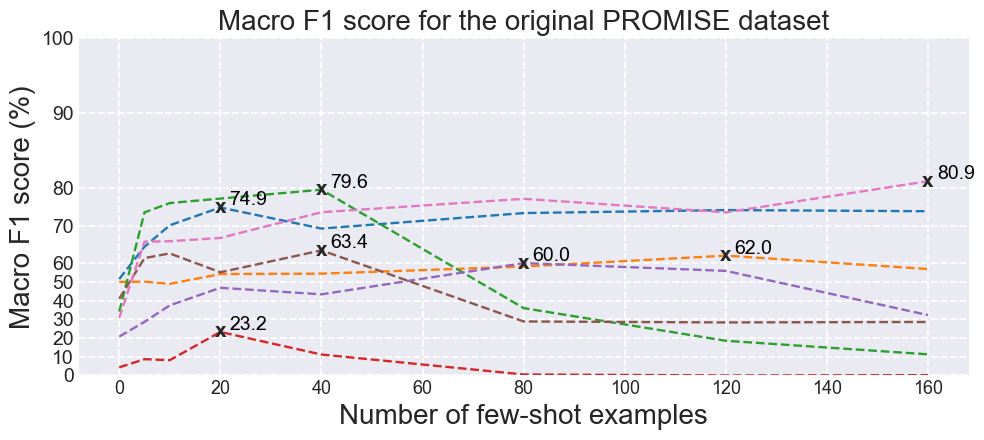

In [ ]:
# RPOMISE binary
save_path = "./figures/line_graph_5models_promise_original_macro.pdf"

x_values = [0, 5, 10, 20, 40, 80, 120, 160]
custom_ticks = [0, 5, 10, 15, 20, 25, 30, 40, 50, 70, 90]  
custom_labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ylim = (0,90)


gpt4_tfidf_promise_b = [51.51, 64.38, 70.11, 74.86, 69.23, 73.37, 74.17, 73.86]
gpt35_tfidf_promise_b = [49.97, 50.09, 48.94, 54.15, 54.38, 58.18, 62.0, 56.85]
mistral7b_tfidf_promise_b = [20.75, 28.64, 37.45, 46.82, 43.33, 60.01, 55.85, 32.25] 
llama8b_tfidf_promise_b = [34.1, 73.56, 76.04, 77.24, 79.62, 35.98, 18.53, 11.29]   
llama1b_tfidf_promise_b = [4.33, 8.7, 8.16, 23.24, 11.18, 0.52, 0.0, 0.15]  
gemma4b_tfidf_promise_b =  [41.01, 61.35, 62.59, 55.1, 63.41, 28.83, 28.33, 28.57]
deepseekv3_tfidf_promise_b = [30.76, 65.73, 65.85, 66.72, 73.59, 77.17, 73.56, 80.94]


plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b,gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo' , 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3'], 
                                 title='Macro F1 score for the original PROMISE dataset', xlabel='Number of few-shot examples', ylabel='Macro F1 score (%)')



## New promise multi-class

90.5
82.0
89.2
73.3
87.2
66.1
89.5


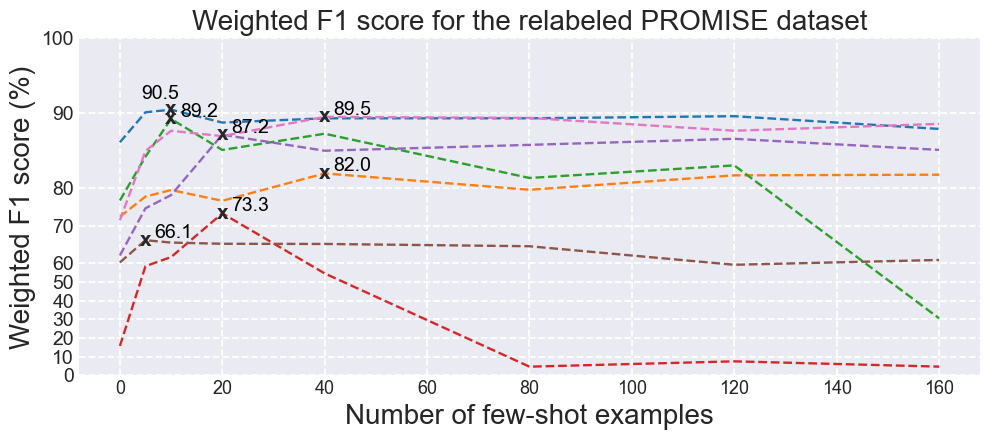

In [ ]:
# NEW RPOMISE multi-class
save_path = "./figures/line_graph_5models_promise_new_weighted.pdf"

x_values = [0, 5, 10, 20, 40, 80, 120, 160]
custom_ticks = [0, 5, 10, 15, 20, 25, 30, 40, 50, 70, 90]  
custom_labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ylim = (0,90)

gpt4_tfidf_promise_b = [86.14, 90.14, 90.49, 88.77, 89.34, 89.34, 89.62, 87.92]
gpt35_tfidf_promise_b = [72.38, 77.78, 79.52, 76.65, 81.98, 79.59, 81.72, 81.81]
mistral7b_tfidf_promise_b = [62.03, 74.65, 78.17, 87.15, 85.01, 85.79, 86.6, 85.12]
llama8b_tfidf_promise_b = [76.72, 84.22, 89.25, 85.11, 87.28, 81.37, 83.05, 30.54]   # embedding
llama1b_tfidf_promise_b = [15.77, 58.37, 61.62, 73.29, 54.5, 4.69, 7.54, 4.72]   # embedding
gemma4b_tfidf_promise_b = [60.19, 66.12, 65.49, 65.17, 65.12, 64.51, 59.12, 60.85]
deepseekv3_tfidf_promise_b = [71.43, 84.98, 87.67, 86.96, 89.53, 89.39, 87.68, 88.59]


plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b,gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3' ], 
                                 title='Weighted F1 score for the relabeled PROMISE dataset', xlabel='Number of few-shot examples', ylabel='Weighted F1 score (%)')

82.9
74.2
79.9
14.2
72.5
73.5
86.5


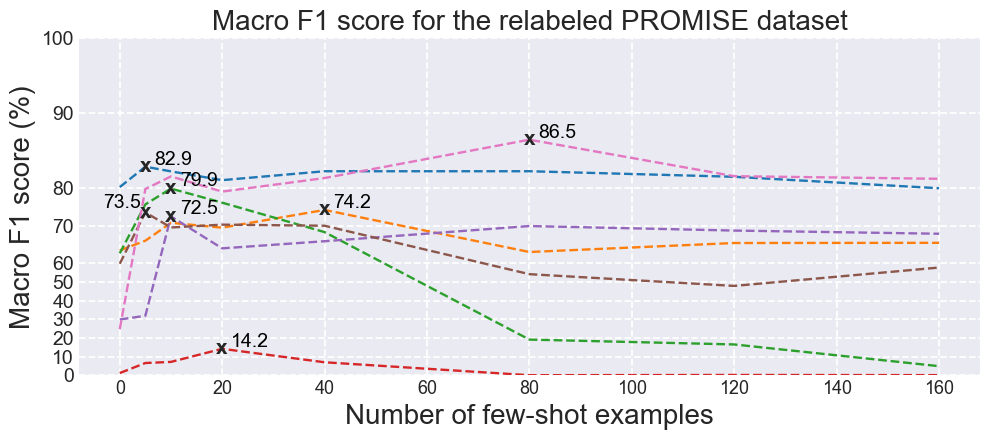

In [ ]:
# RPOMISE binary
save_path = "./figures/line_graph_5models_promise_new_macro.pdf"

x_values = [0, 5, 10, 20, 40, 80, 120, 160]
custom_ticks = [0, 5, 10, 15, 20, 25, 30, 40, 50, 70, 90]  
custom_labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ylim = (0,90)


gpt4_tfidf_promise_b = [80.14, 82.87, 82.24, 81.07, 82.26, 82.26, 81.52, 79.98]
gpt35_tfidf_promise_b = [63.39, 65.97, 70.75, 69.45, 74.19, 62.96, 65.36, 65.41]
mistral7b_tfidf_promise_b = [29.88, 31.87, 72.46, 63.93, 65.84, 69.89, 68.68, 67.83]  #embedding
llama8b_tfidf_promise_b = [62.6, 75.67, 79.89, 76.13, 68.27, 19.15, 16.56, 4.96]   #embedding
llama1b_tfidf_promise_b = [1.28, 6.64, 7.24, 14.23, 7.04, 0.13, 0.26, 0.17]  # embedding
gemma4b_tfidf_promise_b = [59.64, 73.53, 69.5, 70.26, 69.97, 54.08, 47.81, 57.62]
deepseekv3_tfidf_promise_b = [24.77, 79.77, 81.57, 79.08, 81.35, 86.47, 81.6, 81.25]


plot_line_graphs_with_values_mul(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b, gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3' ], 
                                 title='Macro F1 score for the relabeled PROMISE dataset', xlabel='Number of few-shot examples', ylabel='Macro F1 score (%)')



## graphs of a dataset

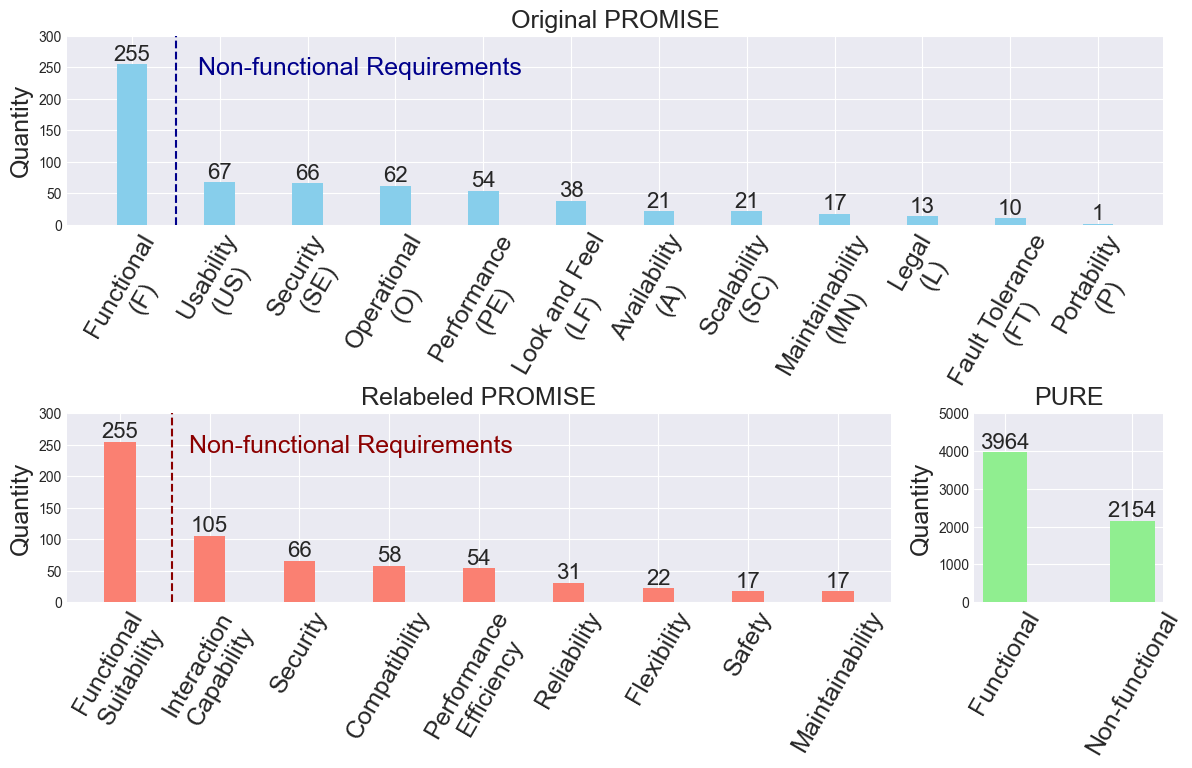

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np  
import matplotlib.gridspec as gridspec  
  
def draw_bar_graph_subplot(save_path, data1, data2, data3, names1, names2, names3):  
    # Set the width of each bar  
    bar_width = 0.35  
      
    # Generate x-axis values based on the length of the data  
    x1 = np.arange(len(data1))  
    x2 = np.arange(len(data2))  
    x3 = np.arange(len(data3))  
      
    # Create a figure  
    fig = plt.figure(figsize=(12, 10))  
      
    # Create a grid with 3 rows and 2 columns  
    gs = gridspec.GridSpec(3, 13, height_ratios=[1, 1, 1])  
      
    # First plot spanning the entire first row  
    ax1 = fig.add_subplot(gs[0, :])  
    ax1.bar(x1, data1, width=bar_width, color='skyblue', label='Original PROMISE')  
    for i, v in enumerate(data1):  
        ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=16)  
    ax1.set_ylabel('Quantity', fontsize = 18)  
    ax1.set_title('Original PROMISE', fontsize = 18)  
    ax1.set_xticks(x1)  
    ax1.set_xticklabels(names1, fontsize=18, rotation=60)  
    #ax1.set_yscale('symlog')  
    ax1.set_ylim([0, 300])  
    
    # Adding vertical line to separate functional and non-functional requirements  
    ax1.axvline(x=0.5, color='darkblue', linestyle='--')  
    # Adding text annotations for functional and non-functional requirements  
    ax1.text(2.6, 230, 'Non-functional Requirements', ha='center', va='bottom', fontsize=18, color='darkblue')  


    
    # Second plot on the second row, first column  
    ax2 = fig.add_subplot(gs[1, :10])  
    ax2.bar(x2, data2, width=bar_width, color='salmon', label='Relabeled PROMISE')  
    for i, v in enumerate(data2):  
        ax2.text(i, v, str(v), ha='center', va='bottom', fontsize=16)  
    ax2.set_ylabel('Quantity', fontsize = 18)  
    ax2.set_title('Relabeled PROMISE', fontsize = 18)  
    ax2.set_xticks(x2)  
    ax2.set_xticklabels(names2, fontsize=18, rotation=60)  
    #ax2.set_yscale('symlog')  
    ax2.set_ylim([0, 300])  
    
    # Adding vertical line to separate functional and non-functional requirements  
    ax2.axvline(x=0.58, color='darkred', linestyle='--')  
    # Adding text annotations for functional and non-functional requirements  
    ax2.text(2.58, 230, 'Non-functional Requirements', ha='center', va='bottom', fontsize=18, color='darkred')  

      
    # Third plot on the second row, second column (small bar graph)  
    ax3 = fig.add_subplot(gs[1, 10:])  
    ax3.bar(x3, data3, width=bar_width, color='lightgreen', label='PURE')  
    for i, v in enumerate(data3):  
        ax3.text(i, v, str(v), ha='center', va='bottom', fontsize=16)  
    ax3.set_ylabel('Quantity', fontsize = 18)  
    ax3.set_title('PURE', fontsize = 18)  
    ax3.set_xticks(x3)  
    ax3.set_xticklabels(names3, fontsize=18, rotation=60)  
    #ax3.set_yscale('symlog')  
    ax3.set_ylim([0, 5000])  
      
    # Adjusting the spacing between subplots  
    plt.tight_layout()  
    plt.subplots_adjust(hspace=1)  # Add space between rows  
      
    # Saving the figure  
    fig.savefig(save_path, bbox_inches='tight')  
      
    # Displaying the subplots  
    plt.show()  
  
# Example usage  
save_path = "./figures/promise_original_relabeled.pdf"
data1 = [255, 67, 66, 62, 54, 38, 21, 21, 17, 13, 10, 1 ]  
#data2 = [255, 105, 66, 62, 54, 31, 22, 17 ]  
data2 = [255, 105, 66, 58, 54, 31, 22, 17, 17 ]  # with "Legal" inclusive, security and legal --> security and safety
data3 = [3964, 2154]
names1 = ['Functional\n(F)', 'Usability\n(US)', 'Security\n(SE)', 'Operational\n(O)', 'Performance\n(PE)', 'Look and Feel\n(LF)', 'Availability\n(A)', 'Scalability\n(SC)', 'Maintainability\n(MN)', 'Legal\n(L)', 'Fault Tolerance\n(FT)', 'Portability\n(P)']  
names2 = ['Functional\nSuitability', 'Interaction\nCapability', 'Security', 'Compatibility', 'Performance\nEfficiency', 'Reliability', 'Flexibility', 'Safety', 'Maintainability']  
names3 = ['Functional', 'Non-functional']
draw_bar_graph_subplot(save_path, data1, data2, data3, names1, names2, names3)  

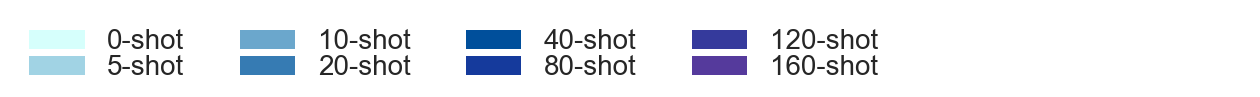

In [ ]:

zero_shot_weighted = [0,0,0] 
five_shots_weighted = [0,0,0] 
ten_shots_weighted = [0,0,0] 
twenty_shots_weighted = [0,0,0] 
forty_shots_weighted = [0,0,0] 
eighty_shots_weighted = [0,0,0] 
one_twenty_shots_weighted = [0,0,0] 
one_sixty_shots_weighted = [0,0,0]
def get_bar_gpt4_highlight(save_path, model, dataset, zero_shot_weighted, five_shots_weighted, ten_shots_weighted, twenty_shots_weighted, forty_shots_weighted, eighty_shots_weighted, one_twenty_shots_weighted, one_sixty_shots_weighted):
    w = 0.1
    x = [" ", " ", " "]  #, "tf-idf + random"]

    bar1 = np.arange(len(x))
    #bar1 = [x-0.2 for x in bar1]
    bar2 = [i+w for i in bar1]
    bar3 = [i+w for i in bar2]
    bar4 = [i+w for i in bar3]
    bar5 = [i+w for i in bar4]
    bar6 = [i+w for i in bar5]
    bar7 = [i+w for i in bar6]
    bar8 = [i+w for i in bar7]

    fig, ax = plt.subplots( figsize=(16, 1) ) 

    #ax.bar(2.7,eighty_shots_weighted[-1], w+0.04, color = "#15323c")
    ax.set_facecolor('white')  
    ax.bar(bar1,zero_shot_weighted, w, color = "#D6FFFC", label="0-shot")
    ax.bar(bar2,five_shots_weighted, w, color = "#A1D3E4", label="5-shot")
    ax.bar(bar3,ten_shots_weighted, w, color = "#6BA7CC", label="10-shot")
    ax.bar(bar4,twenty_shots_weighted, w, color = "#367BB3", label="20-shot")
    ax.bar(bar5,forty_shots_weighted, w, color = "#004F9B", label="40-shot")
    ax.bar(bar6,eighty_shots_weighted, w, color = "#153A9c", label="80-shot")
    ax.bar(bar7,one_twenty_shots_weighted, w, color = "#353A9c", label="120-shot")
    ax.bar(bar8,one_sixty_shots_weighted, w, color = "#553A9c", label="160-shot")

    
    #ax.bar(2.3,twenty_shots_weighted[2]+0.66, w+0.01, color = "red") # for highlight  
    #ax.bar(2.3,twenty_shots_weighted[2], w-0.01, color = "#367BB3") # for highlight  
    #ax.text(2.25, twenty_shots_weighted[2]+5, 'best', color = "red", fontsize=17)
    #ax.axhline(y = twenty_shots_weighted[2]+0.4, color = 'red', linestyle = ':', linewidth = 1.5)  



    ax.yaxis.set_visible(False) 
    ax.xaxis.set_visible(False)  


    #ax.set_title(model + ": " + dataset + " dataset", fontsize=22)
    
    # ax.yaxis.grid(linestyle=':', linewidth=2)

    ax.legend(loc='upper left', 
              ncol=4, borderpad=0.2, labelspacing=0, prop={'size': 20})

    # mark the exact number above the bar
    # bars = [zero_shot_weighted, five_shots_weighted, ten_shots_weighted, twenty_shots_weighted, forty_shots_weighted, eighty_shots_weighted, one_twenty_shots_weighted, one_sixty_shots_weighted]
    # for index_bar, bar in enumerate(bars):
    #     for x1,y1 in enumerate(bar):
    #         ax.text(x1+index_bar * w, y1+1.2, round(y1,3) ,ha='center',fontsize=13)

    fig.savefig(save_path, bbox_inches='tight') 


save_path = "./figures/bar_graph_legends.pdf"
model = "GPT-3.5-turbo"
dataset = "PROMISE"

get_bar_gpt4_highlight(save_path, model, dataset, zero_shot_weighted, five_shots_weighted, ten_shots_weighted, twenty_shots_weighted, forty_shots_weighted, eighty_shots_weighted, one_twenty_shots_weighted, one_sixty_shots_weighted)


In [234]:
def plot_line_legends(save_path, x_values, custom_ticks, custom_labels, ylim, *lists, labels=None, title='Line Graph', xlabel='X-axis', ylabel='Y-axis'):
    """
    plot the legends larger

    """
    
    def custom_transform(y):  
        if y <= 60:  
            return y * 0.5
        elif y <= 80:  
            return 30 + (y - 60)
        else:  
            return 50 + (y - 80) * 2
  
    def inverse_transform(y):  
        if y <= 30:  
            return y * 2  
        elif y <= 50:  
            return 60 + (y - 30)  
        else:  
            return 80 + (y - 50) / 2  


    
    # Verify that all data lists have the same length as x_values
    for data in lists:
        if len(data) != len(x_values):
            raise ValueError("All input lists must have the same length as the x_values list. length of input list: {}. length of x_value list: {}.".format( len(data), len(x_values) ))
    
    # Check if labels are provided and match the number of lists
    if labels and len(labels) != len(lists):
        raise ValueError("Number of labels must match the number of lists provided. Number of labels: {}. Number of lists: {}.".format(len(labels), len(lists)))
    
    # Set a style for the plot
    #plt.style.use('seaborn-v0_8-darkgrid')

    # Create a figure and an axes
    fig, ax = plt.subplots( figsize=(16, 1))
    ax.set_facecolor('white')  


    # Plot each list
    for i, data in enumerate(lists):
        # transform the data based on the specific y axis
        data = np.array([custom_transform(val) for val in data])  

        label = labels[i] if labels else f'Line {i+1}'
        ax.plot(x_values, data, label=label, linewidth=2)

    
        # #Annotate each point with its value
        # for x, y in zip(x_values, data):
        #     if y == max(data):
        #         # position is already transformed with the customed y_axis
        #         ax.text(x, y, 'x', fontsize=16,fontweight='bold', ha='center', va='center')  

        #         if np.round(inverse_transform(y),1) == 75.9:
        #             ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(17, -4), textcoords='offset points', fontsize=15, color='black', ha='center')
        #             continue
        #         elif np.round(inverse_transform(y),1) == 88.9:
        #             ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(17, -4), textcoords='offset points', fontsize=15, color='black', ha='center')                                                    # value need to inverse transformed
        #             continue
        #         # value need to inverse transformed
        #         ax.annotate(f'{np.round(inverse_transform(y),1)}', xy=(x, y), xytext=(17, 2), textcoords='offset points', fontsize=15, color='black', ha='center')
            
    # Add grid, legend, and labels
    # ax.grid(True, which='both', linestyle='--', linewidth=1.3, alpha=1)
    ax.legend(loc='center', ncol=4, borderpad=0, labelspacing=0.2, prop={'size': 24} )
    # ax.set_title(title, fontsize = 20)
    # ax.set_xlabel(xlabel, fontsize = 20)
    # ax.set_ylabel(ylabel, fontsize = 20)
    
    # Set custom ticks and labels  
    # ax.tick_params(axis='x', labelsize=13)
    # ax.set_yticks(custom_ticks)  
    # ax.set_yticklabels(custom_labels ,fontsize = 14)  
    # ax.set_ylim(ylim[0],ylim[1]) 

      
    # Formatter to display custom y-axis labels  
    # formatter = FuncFormatter(lambda val, pos: f'{inverse_transform(val):.0f}')  
    # ax.yaxis.set_major_formatter(formatter)  


    ax.yaxis.set_visible(False) 
    ax.xaxis.set_visible(False)  

    # Optimize layout
    fig.tight_layout()

    # Display the plot
    plt.show()

    fig.savefig(save_path, bbox_inches='tight') 

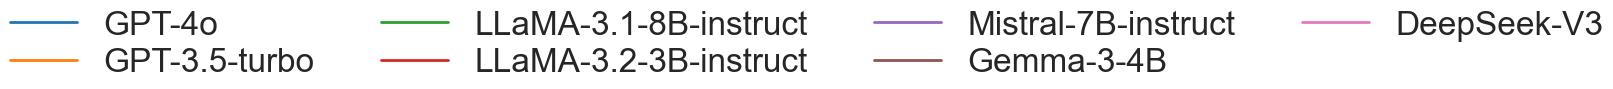

In [ ]:
# RPOMISE binary
save_path = "./figures/line_graph_legends.pdf"

x_values = [0,0,0,0,0,0,0,0]
custom_ticks = [0,0,0,0,0,0,0,0]  
custom_labels = [0,0,0,0,0,0,0,0]
ylim = (0,1)


gpt4_tfidf_promise_b = [0,0,0,0,0,0,0,0]
gpt35_tfidf_promise_b = [0,0,0,0,0,0,0,0]
mistral7b_tfidf_promise_b = [0,0,0,0,0,0,0,0]  #embedding
llama8b_tfidf_promise_b = [0,0,0,0,0,0,0,0]   #embedding
llama1b_tfidf_promise_b = [0,0,0,0,0,0,0,0]
gemma4b_tfidf_promise_b = [0,0,0,0,0,0,0,0]
deepseekv3_tfidf_promise_b = [0,0,0,0,0,0,0,0]# embedding

plot_line_legends(save_path, x_values, custom_ticks, custom_labels, ylim,
                                 gpt4_tfidf_promise_b, gpt35_tfidf_promise_b, llama8b_tfidf_promise_b, llama1b_tfidf_promise_b, mistral7b_tfidf_promise_b, gemma4b_tfidf_promise_b, deepseekv3_tfidf_promise_b,
                                 labels=['GPT-4o', 'GPT-3.5-turbo', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct', 'Mistral-7B-instruct', 'Gemma-3-4B','DeepSeek-V3' ], 
                                 title='Macro F1 score for the relabeled PROMISE dataset', xlabel='Number of few-shot examples', ylabel='Macro F1 score (%)')



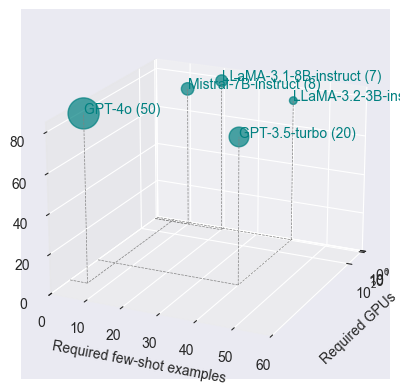

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# BERT variants
# PRC-RoBERTa-large
# PRC-BERT-base
# NoR-BERT-large
# NoR-BERT-base

# Example data
required_gpu_memory = np.array([500, 350, 16, 17, 6])  # X-axis
dataset_size = np.array([5, 40, 10, 20, 40])  # Y-axis
f1_score = np.array([84.88, 74.19, 72.46, 79.22, 73.29])  # Z-axis
model_size = np.array([50, 20, 8, 7, 3])  # Sizes for point markers
model_names = ['GPT-4o', 'GPT-3.5-turbo','Mistral-7B-instruct', 'LLaMA-3.1-8B-instruct', 'LLaMA-3.2-3B-instruct']  # Names of models
model_colors = ['teal', 'teal', 'teal', 'teal', 'teal']  # Example colors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(required_gpu_memory, dataset_size, f1_score, s=model_size*10, c=model_colors, alpha=0.7)

# Add labels to each point
for i, (x, y, z) in enumerate(zip(required_gpu_memory, dataset_size, f1_score)):
    ax.text(x, y, z, f'{model_names[i]} ({model_size[i]})', color=model_colors[i])

# Draw projections to 3 planes
for i, (x, y, z) in enumerate(zip(required_gpu_memory, dataset_size, f1_score)):
    ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='dashed', linewidth=0.5)  # XY plane
    # ax.plot([x, x], [0, y], [z, z], color='gray', linestyle='dashed', linewidth=0.5)  # XZ plane
    # ax.plot([0, x], [y, y], [z, z], color='gray', linestyle='dashed', linewidth=0.5)  # YZ plane
    ax.plot([x, x], [0, y], [0, 0], color='gray', linestyle='dashed', linewidth=0.5)  # XZ plane
    ax.plot([0, x], [y, y], [0, 0], color='gray', linestyle='dashed', linewidth=0.5)  # YZ plane

# Set axis limits to maintain proportions
ax.set_xlim([0, 600])
ax.set_ylim([0, 60])
ax.set_zlim([0, max(f1_score)])

# Rotate the view to set origin at the desired corner
ax.view_init(elev=20, azim=25)

# Label axes
ax.set_xlabel('Required GPUs')
ax.set_ylabel('Required few-shot examples')
ax.set_zlabel('Optimal F1 Score (%)')

ax.set_xscale('symlog')


plt.show()

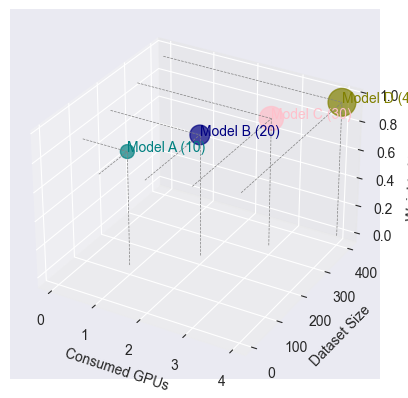

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example data
consumed_gpus = np.array([1, 2, 3, 4])  # X axis
dataset_size = np.array([100, 200, 300, 400])  # Y axis
f1_score = np.array([0.8, 0.85, 0.9, 0.95])  # Z axis
model_size = np.array([10, 20, 30, 40])  # Sizes for point markers
model_names = ['Model A', 'Model B', 'Model C', 'Model D']  # Names of models

# Assign colors manually to each model
model_colors = ['teal', 'navy', 'pink', 'Olive']  # Example: 'red' for Model A, 'blue' for Model B, etc.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with manual color assignment
sc = ax.scatter(consumed_gpus, dataset_size, f1_score, s=model_size*10, c=model_colors, alpha=0.7)

# Add labels to each point
for i, (x, y, z) in enumerate(zip(consumed_gpus, dataset_size, f1_score)):
    ax.text(x, y, z, f'{model_names[i]} ({model_size[i]})', color=model_colors[i])

# Draw projections to 3 planes
for i, (x, y, z) in enumerate(zip(consumed_gpus, dataset_size, f1_score)):
    # Projection on XY plane
    ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='dashed', linewidth=0.5)
    # Projection on XZ plane
    ax.plot([x, x], [0, y], [z, z], color='gray', linestyle='dashed', linewidth=0.5)
    # Projection on YZ plane
    ax.plot([0, x], [y, y], [z, z], color='gray', linestyle='dashed', linewidth=0.5)

# Label axes
ax.set_xlabel('Consumed GPUs')
ax.set_ylabel('Dataset Size')
ax.set_zlabel('Weighted F1 Score')

plt.show()

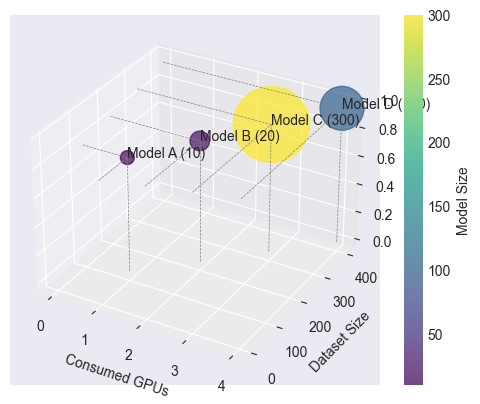

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example data
consumed_gpus = np.array([1, 2, 3, 4])  # X axis
dataset_size = np.array([100, 200, 300, 400])  # Y axis
f1_score = np.array([0.8, 0.85, 0.9, 0.95])  # Z axis
model_size = np.array([10, 20, 300, 100])  # Sizes for point markers
model_names = ['Model A', 'Model B', 'Model C', 'Model D']  # Names of models

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(consumed_gpus, dataset_size, f1_score, s=model_size*10, c=model_size, cmap='viridis', alpha=0.7)

# Add labels to each point
for i, (x, y, z) in enumerate(zip(consumed_gpus, dataset_size, f1_score)):
    ax.text(x, y, z, f'{model_names[i]} ({model_size[i]})')

# Draw projections to 3 planes
for i, (x, y, z) in enumerate(zip(consumed_gpus, dataset_size, f1_score)):
    # Projection on XY plane
    ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='dashed', linewidth=0.5)
    # Projection on XZ plane
    ax.plot([x, x], [0, y], [z, z], color='gray', linestyle='dashed', linewidth=0.5)
    # Projection on YZ plane
    ax.plot([0, x], [y, y], [z, z], color='gray', linestyle='dashed', linewidth=0.5)

# Label axes
ax.set_xlabel('Consumed GPUs')
ax.set_ylabel('Dataset Size')
ax.set_zlabel('Weighted F1 Score')

# Add a color bar to understand the mapping of colors to model size
plt.colorbar(sc, ax=ax, label='Model Size')

plt.show()


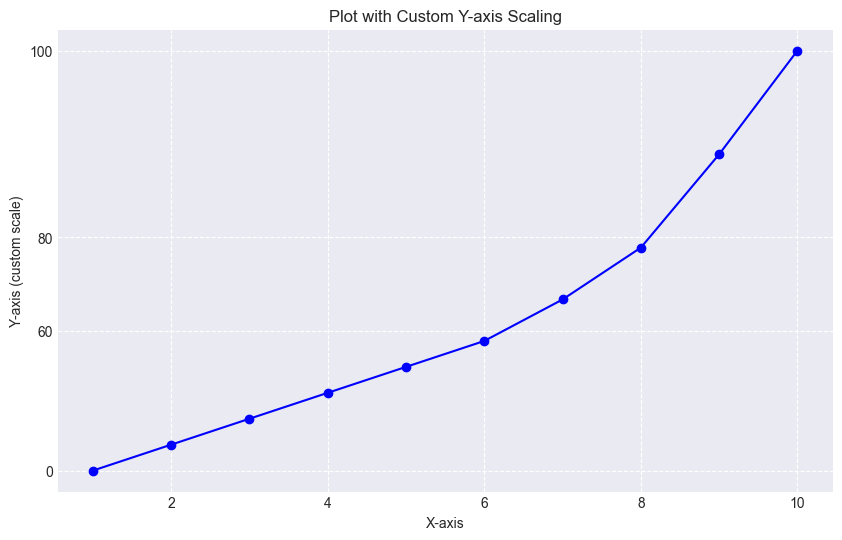

In [61]:
import matplotlib.pyplot as plt  
import numpy as np  
from matplotlib.ticker import FuncFormatter  
  
def custom_transform(y):  
    if y <= 60:  
        return y * 0.5  
    elif y <= 80:  
        return 30 + (y - 60)  
    else:  
        return 50 + (y - 80) * 2  
  
def inverse_transform(y):  
    if y <= 30:  
        return y * 2  
    elif y <= 50:  
        return 60 + (y - 30)  
    else:  
        return 80 + (y - 50) / 2  
  
def plot_with_custom_y_axis(x, y):  
    transformed_y = np.array([custom_transform(val) for val in y])  
      
    fig, ax = plt.subplots(figsize=(10, 6))  
    ax.plot(x, transformed_y, marker='o', linestyle='-', color='b')  
      
    # Set custom ticks and labels  
    custom_ticks = [0, 30, 50, 90]  
    custom_labels = [0, 60, 80, 100]  
    ax.set_yticks(custom_ticks)  
    ax.set_yticklabels(custom_labels)  
      
    # Formatter to display custom y-axis labels  
    formatter = FuncFormatter(lambda val, pos: f'{inverse_transform(val):.0f}')  
    ax.yaxis.set_major_formatter(formatter)  
      
    ax.set_xlabel('X-axis')  
    ax.set_ylabel('Y-axis (custom scale)')  
    ax.set_title('Plot with Custom Y-axis Scaling')  
    ax.grid(True, which="both", ls="--")  
      
    plt.show()  
  
# Example usage  
x = np.linspace(1, 10, 10)  
y = np.linspace(0, 100, 10)  # Example data  
plot_with_custom_y_axis(x, y)  

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

def model_size_performance(save_path, x, y, model_name, x_limit, y_limit, color):

    # plot
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title("The correlation between model size and performance\nwhen using " + '"prompt engineering".')
    ax.set_xlim(x_limit[0], x_limit[1])
    ax.set_ylim(y_limit[0], y_limit[1])
    ax.set_xlabel("Billion parameters (model size)", fontsize=14)
    ax.set_ylabel("The weighted F1 score (%)", fontsize=14)
    
    ax.set_xscale('symlog')
    #ax.set_xticks([1,10,100,1000])
    ax.grid(linestyle=':', linewidth=1)

    
    model_size_normal = [ x[i]*10 for i in range(len(x))]
    
    ax.scatter(x, y, s=model_size_normal, c = color[0] )
    #ax.scatter(x, y, s=model_size, c=model_size, vmin=0, vmax=100)
    
#     for i in range(len(model_name)):
#         if i == 0:
#             text = str(x[i]) + "B,  " + str(y[i]) + "%"
#             ax.text(x[i], y[i]-7, model_name[i], color=color[1], ha='center', fontsize=10)
#             ax.text(x[i], y[i]-4, text, color=color[1], ha='center', fontsize=10)
#             ax.axvline(x = x[i], ymin = 0, ymax = y[i]/y_limit[1], color=color[1], linestyle = ":", linewidth = 1 )
#             ax.axhline(y = finetuned_f1[1], xmin = 0, xmax = 0.815, color = color[1], linestyle = ":", linewidth = 1 )   
#             continue
#         if i == 3:    
#             text =  "? B,  " + str(y[i]) + "%"
#         else:
#             text = str(x[i]) + "B,  " + str(y[i]) + "%"
#         ax.text(x[i], y[i]+5, model_name[i], color=color[1], ha='center', fontsize=10)
#         ax.text(x[i], y[i]+2, text, color=color[1], ha='center', fontsize=10)
#         ax.axvline(x = x[i], ymin = 0, ymax = y[i]/y_limit[1], color = color[1], linestyle = ":", linewidth = 1 )    


    for i in range(len(model_name)):
        if i == 0:
            text = str(x[i]) + "B,  " + str(y[i]) + "%"
            ax.text(x[i], y[i]-7, model_name[i], color=color[1], ha='center', fontsize=10)
            ax.text(x[i], y[i]-4, text, color=color[1], ha='center', fontsize=10)
            ax.axvline(x = x[i], ymin = 0, ymax = y[i]/y_limit[1], color=color[1], linestyle = ":", linewidth = 1 )
            ax.axhline(y = y[i], xmin = 0, xmax = 0.37, color = color[1], linestyle = ":", linewidth = 1 )   
            continue
        if i == 1:
            text = str(x[i]) + "B,  " + str(y[i]) + "%"
            ax.text(x[i], y[i]+4.5, model_name[i], color=color[1], ha='center', fontsize=10)
            ax.text(x[i], y[i]+1.5, text, color=color[1], ha='center', fontsize=10)
            ax.axvline(x = x[i], ymin = 0, ymax = y[i]/y_limit[1], color = color[1], linestyle = ":", linewidth = 1 )         
            ax.axhline(y = y[i], xmin = 0, xmax = 0.43, color = color[1], linestyle = ":", linewidth = 1 )   

        if i == 2:
            text = str(x[i]) + "B,  " + str(y[i]) + "%"
            ax.text(x[i], y[i]+5.5, model_name[i], color=color[1], ha='center', fontsize=10)
            ax.text(x[i], y[i]+2.5, text, color=color[1], ha='center', fontsize=10)
            ax.axvline(x = x[i], ymin = 0, ymax = y[i]/y_limit[1], color = color[1], linestyle = ":", linewidth = 1 )         
            ax.axhline(y = y[i], xmin = 0.51, xmax = 0.68, color = color[1], linestyle = ":", linewidth = 1 )   
            ax.axhline(y = y[i], xmin = 0, xmax = 0.34, color = color[1], linestyle = ":", linewidth = 1 )   
    
        if i == 3:    
            text =  "? B,  " + str(y[i]) + "%"
            ax.text(x[i], y[i]+5, model_name[i], color=color[1], ha='center', fontsize=10)
            ax.text(x[i], y[i]+2, text, color=color[1], ha='center', fontsize=10)
            ax.axvline(x = x[i], ymin = 0, ymax = y[i]/y_limit[1], color = color[1], linestyle = ":", linewidth = 1 )         
            ax.axhline(y = y[i], xmin = 0, xmax = 0.86, color = color[1], linestyle = ":", linewidth = 1 )   

        
    # ax.legend()
    
    #fig.savefig(save_path, bbox_inches='tight') 

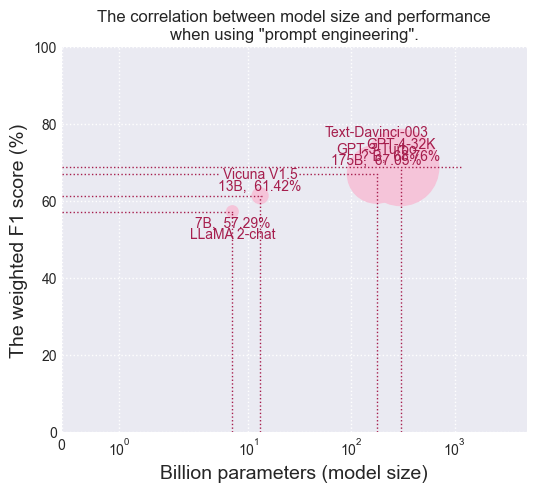

In [13]:
save_path = "C:/Siemens old windows machine document folder/Master Thesis/final_thesis_figures/experiments/tradeoff_prompt.pdf"
x = [7,13,175,300]
y = [57.29, 61.42, 67.05, 68.76]
model_name = ['LLaMA 2-chat', 'Vicuna V1.5', 'Text-Davinci-003\nGPT-3-Turbo', 'GPT-4-32K']
color = ["#f5c4d9" ,"#a61e4d"]

x_limit = [0, 5000]
y_limit = [0, 100]
model_size_performance(save_path, x,y, model_name, x_limit, y_limit, color)